#**Desafío 0 - Procesamiento del Habla**
**Materia: Procesamiento del Habla.**

**Consigna**
- Cree una nube de palabras de un texto en español.
- Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.
- Puede usar cualquier libreria o herramienta para obtener el texto de su interés.
- En este notebook explica el paso a paso del proceso.


**Introducción**

 En este notebook se realizará un análisis de texto mediante web scraping y la creación de una nube de palabras. Primero, se extrae el texto de una página de Wikipedia sobre Inteligencia Artificial utilizando técnicas de scraping. Luego, se genera una nube de palabras que visualiza las palabras del texto extraído. Se mejorará la nube de palabras al incluir stopwords en español para filtrar términos comunes y se aplicará una paleta de colores para enriquecer la visualización.

##**Instalación de Librerías para Web Scraping y Creación de Nubes de Palabras**

En esta sección, se instalan las librerías necesarias para realizar el scraping de la web y crear nubes de palabras. Se utilizan **requests** para gestionar las solicitudes HTTP, **beautifulsoup4** para analizar y extraer el contenido HTML de las páginas web, y **wordcloud** junto con matplotlib para generar y visualizar la nube de palabras.

In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install wordcloud

##**Configuración de Entorno: Importación de Librerías para Procesamiento de Texto y Visualización**

Acá se importan las librerías previamente instaladas. requests y BeautifulSoup se encargan de la extracción del contenido de la página web, WordCloud facilita la creación de la nube de palabras y matplotlib se utiliza para mostrar visualmente la nube generada.

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


##**Web Scraping de Wikipedia: Obtención y Visualización del Texto sobre Inteligencia Artificial**

En esta parte, se realiza una solicitud a la página de Wikipedia sobre Inteligencia Artificial para obtener el contenido de la página. Se extrae el texto del párrafo relevante y se muestra el texto para confirmar que se ha extraído correctamente.

In [ ]:
# URL de la página de Wikipedia sobre "Inteligencia Artificial"
url = "https://es.wikipedia.org/wiki/Inteligencia_artificial"

# Realizamos la solicitud a la URL
response = requests.get(url)

# Parsear el contenido HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Extraer el texto del contenido principal de Wikipedia (usualmente está dentro de <p>)
paragraphs = soup.find_all('p')
extracted_text = ' '.join([p.get_text() for p in paragraphs])

# Mostrar el texto extraído
print(extracted_text[:378])  # Imprime solo los primeros 378 caracteres



La inteligencia artificial  (IA), en el contexto de las ciencias de la computación, es una disciplina y un conjunto de capacidades cognoscitivas e intelectuales expresadas por sistemas informáticos o combinaciones de algoritmos cuyo propósito es la creación de máquinas que imiten la inteligencia humana para realizar tareas, y que pueden mejorar conforme recopilen información.


##**Creación de una Nube de Palabras con el Texto Extraído de Wikipedia sobre IA**

Se genera una nube de palabras utilizando el texto extraído. Se configura el fondo de la nube de palabras en gris claro para facilitar la visualización y se muestra la nube resultante para observar las palabras del texto.

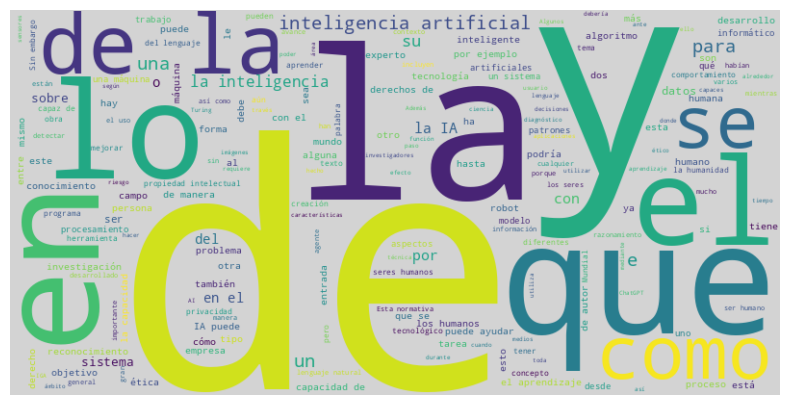

In [ ]:
# Crear la nube de palabras con el texto extraído
wordcloud = WordCloud(width=800, height=400, background_color="lightgray").generate(extracted_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##**Generación de Nube de Palabras con Stopwords en Español**

En este paso, se mejora la nube de palabras al incluir una lista de stopwords en español, es decir, palabras comunes que se excluyen para resaltar términos más significativos. Además, se aplica la paleta de colores 'plasma' y un fondo celeste para dar un aspecto visual más atractivo a la nube de palabras.

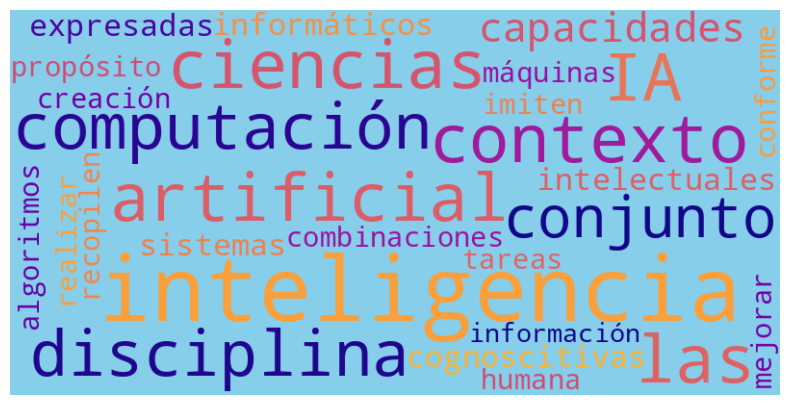

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# URL de la página de Wikipedia sobre "Inteligencia Artificial"
url = "https://es.wikipedia.org/wiki/Inteligencia_artificial"

# Realizamos la solicitud a la URL
response = requests.get(url)

# Parsear el contenido HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Extraer el texto del contenido principal de Wikipedia
paragraphs = soup.find_all('p')
extracted_text = ' '.join([p.get_text() for p in paragraphs])

# Limitar el texto a los primeros 378 caracteres
limited_text = extracted_text[:378]

# Definir stopwords en español
stopwords_es = set(STOPWORDS)
stopwords_es.update(["e","cuyo","pueden", "con", "que", "los", "para", "un", "una", "el", "la", "en", "y", "o", "de", "a", "se", "es", "al", "como", "por", "no", "su", "más", "pero", "si", "este", "esta", "eso", "esa", "todo", "todos", "todas", "cada", "cual", "cualquier", "algo", "alguna", "algún", "ningún", "ninguna", "ninguno", "otro", "otros", "otras", "sobre", "entre", "durante", "desde", "hasta", "también", "así", "mismo", "misma", "mismo", "misma", "tan", "tanto", "tanta", "muy", "poco", "poca", "poco", "nada", "solo", "sola", "solo", "sola", "siempre", "nunca", "jamás", "casi", "aproximadamente", "cerca", "lejos", "antes", "después", "ahora", "hoy", "ayer", "mañana", "luego", "mientras", "mientras tanto", "después de", "antes de", "durante", "sin", "aunque", "a pesar de", "debido a", "gracias a", "por qué", "cómo", "dónde", "cuándo", "quién", "qué", "cuál"])

# Crear un objeto WordCloud con stopwords en español usando el texto limitado
wordcloud = WordCloud(width=800, height=400, background_color="skyblue", stopwords=stopwords_es,colormap='plasma').generate(limited_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
